In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%reload_ext autoreload
%autoreload 2
import itertools
import sys
sys.path.append('/home/roquero/CausalAggregation/Code')
from generateEnvironment import GenerateEnvironment
from solveProblem import SolveProblem
import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
np.set_printoptions(suppress=True)
np.set_printoptions(precision=5)

/home/roquero/miniconda3/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
connectivity_e0 = np.array([
    [0,0,0,0,0,0,0,0], # H / 0
    [0,0,0,0,0,0,0,0], # I / 1
    [2,0,0,0,-1,0,0,0], # X_1 / 2
    [1,0,1,0,0,0,0,0], # X_2 / 3
    [0,0,0,2,0,0,0,0], # X_3 / 4
    [0,0,1,0,1,0,0,0], # X_4 / 5
    [1,0,0,1,0,2,0,0], # Y / 6
    [0,0,0,1,0,2,-1,0], # X_5 / 7
])
x_indices=np.array([2,3,4,5,7])
y_index=6
n_samples=500
n_reps=500
alpha=0.05

In [3]:
for n_samples in np.array([50,100,200,500,1000]):
    coverage=[]
    length=[]
    for _ in np.arange(n_reps):
        list_dict_interventions = [{2:{'type':'iv','iv_index':1}}]
        list_dict_interventions.append({i:{'type':'independent'} for i in [4,7]})
        list_dict_interventions.append({3:{'type':'independent','iv_index':1}, 5:{'type':'parental','parental_index':[2,4]}})
        
        solver = SolveProblem(connectivity_e0,x_indices,y_index)
        
        list_environments = [solver.generate_intervention(n_samples, dict_interventions)
                             for dict_interventions in list_dict_interventions]
        
        _, CI = solver.compute_asymptotic_cov(list_environments, alpha)

        for coord in np.arange(5):
            coverage.append((CI[0,coord]<solver.beta[coord])&
                        (CI[1,coord]>solver.beta[coord]))
            length.append(CI[1,coord]-CI[0,coord])
            
    print('For n_samples {}: Avg coverage: {} pm{}. Avg length: {} pm{}.'.format(n_samples,np.mean(coverage),2*np.std(coverage)/np.sqrt(n_reps),np.mean(length),2*np.std(length)/np.sqrt(n_reps))
         )

For n_samples 50: Avg coverage: 0.9792 pm0.0127647514664407. Avg length: 2.200631072896988 pm1.1634299040946456.
For n_samples 100: Avg coverage: 0.9772 pm0.013350703352258264. Avg length: 0.7380275125578073 pm0.036783094506234223.
For n_samples 200: Avg coverage: 0.9776 pm0.013235781805394043. Avg length: 0.4743669767020039 pm0.014527492906770077.
For n_samples 500: Avg coverage: 0.9692 pm0.015453507045327934. Avg length: 0.28614820341110125 pm0.007095373366267769.
For n_samples 1000: Avg coverage: 0.97 pm0.01525778489820852. Avg length: 0.20171571544952893 pm0.0047394950704430835.


/home/roquero/miniconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/roquero/miniconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


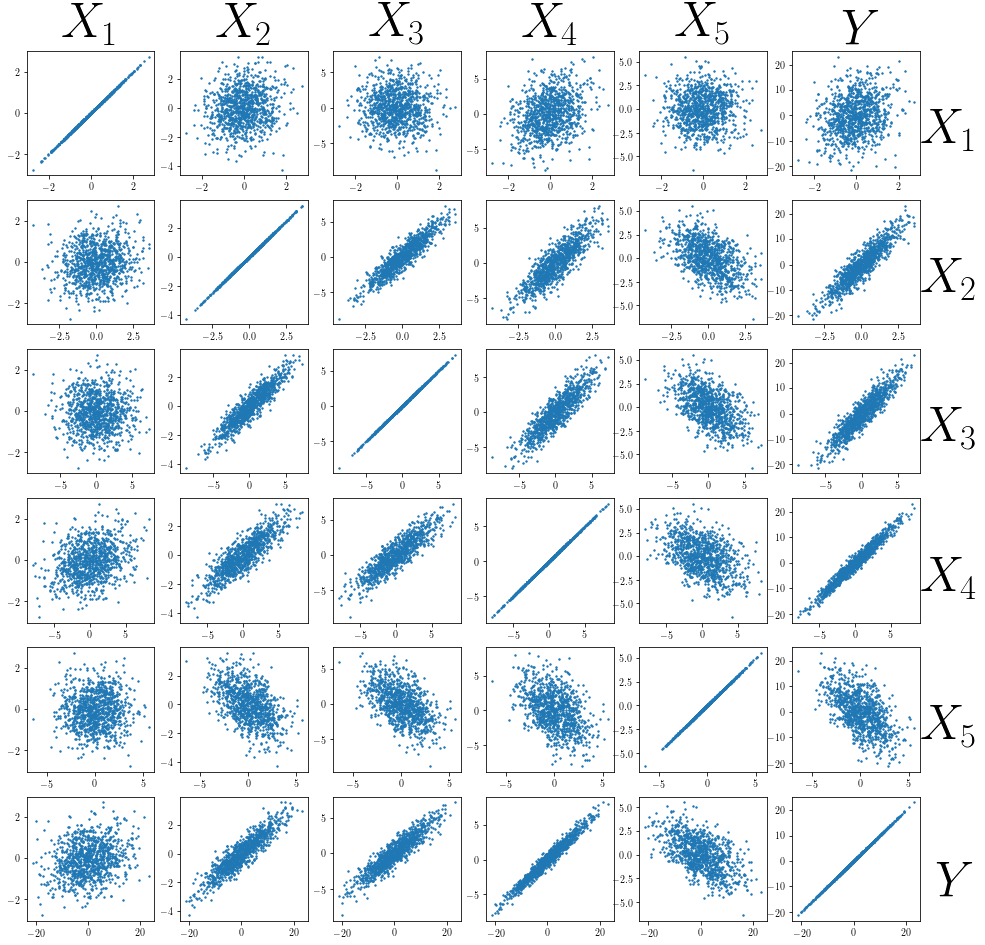

In [4]:
env_id=0
X=list_environments[env_id]['dataset'][x_indices,:]
Y=list_environments[env_id]['dataset'][y_index,:]
fig, ax = plt.subplots(nrows=len(x_indices)+1,ncols=len(x_indices)+1, figsize=(16,16))
for i,j in itertools.product(np.arange(len(x_indices)),repeat=2):
    _ = ax[i,j].scatter(X[i,:],X[j,:],s=2, rasterized=True)
for i in np.arange(len(x_indices)):
    _ = ax[len(x_indices),i].scatter(Y, X[i,:], s=2, rasterized=True)
    _ = ax[i,len(x_indices)].scatter(X[i,:], Y, s=2, rasterized=True)
    _ = ax[0,i].set_title('$X_{}$'.format(i+1), fontsize=50)
    _ = ax[i,len(x_indices)].yaxis.set_label_position("right")
    _ = ax[i,len(x_indices)].set_ylabel('$X_{}$'.format(i+1), rotation=360, labelpad=30, fontsize=50)
_ = ax[len(x_indices),len(x_indices)].scatter(Y, Y, s=2, rasterized=True)
_ = ax[0,5].set_title('$Y$', fontsize=50)
_ = ax[5,5].yaxis.set_label_position("right")
_ = ax[5,5].set_ylabel('$Y$', rotation=360, labelpad=30, fontsize=50)
_ = plt.savefig('scatter_{}.png'.format(env_id), format='png',bbox_inches='tight')

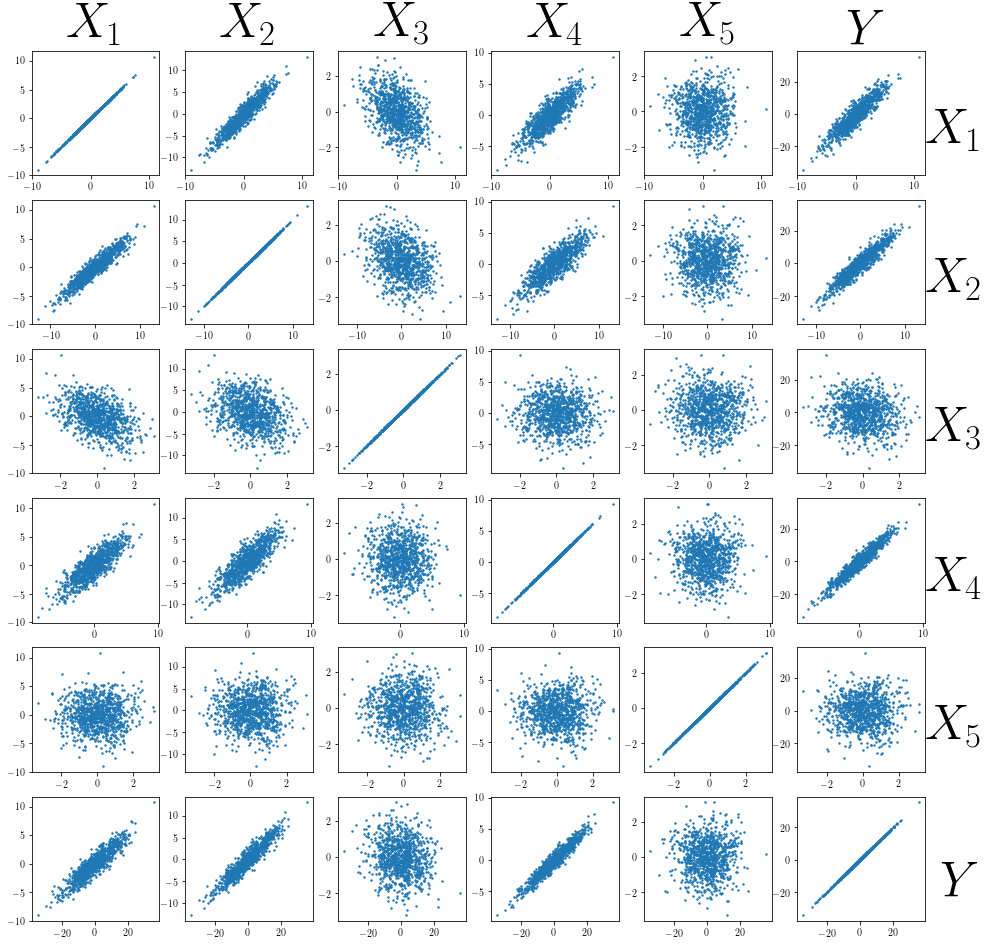

In [5]:
env_id=1
X=list_environments[env_id]['dataset'][x_indices,:]
Y=list_environments[env_id]['dataset'][y_index,:]
fig, ax = plt.subplots(nrows=len(x_indices)+1,ncols=len(x_indices)+1, figsize=(16,16))
for i,j in itertools.product(np.arange(len(x_indices)),repeat=2):
    _ = ax[i,j].scatter(X[i,:],X[j,:],s=2, rasterized=True)
for i in np.arange(len(x_indices)):
    _ = ax[len(x_indices),i].scatter(Y, X[i,:], s=2, rasterized=True)
    _ = ax[i,len(x_indices)].scatter(X[i,:], Y, s=2, rasterized=True)
    _ = ax[0,i].set_title('$X_{}$'.format(i+1), fontsize=50)
    _ = ax[i,len(x_indices)].yaxis.set_label_position("right")
    _ = ax[i,len(x_indices)].set_ylabel('$X_{}$'.format(i+1), rotation=360, labelpad=30, fontsize=50)
_ = ax[len(x_indices),len(x_indices)].scatter(Y, Y, s=2, rasterized=True)
_ = ax[0,5].set_title('$Y$', fontsize=50)
_ = ax[5,5].yaxis.set_label_position("right")
_ = ax[5,5].set_ylabel('$Y$', rotation=360, labelpad=30, fontsize=50)
_ = plt.savefig('scatter_{}.png'.format(env_id), format='png',bbox_inches='tight')

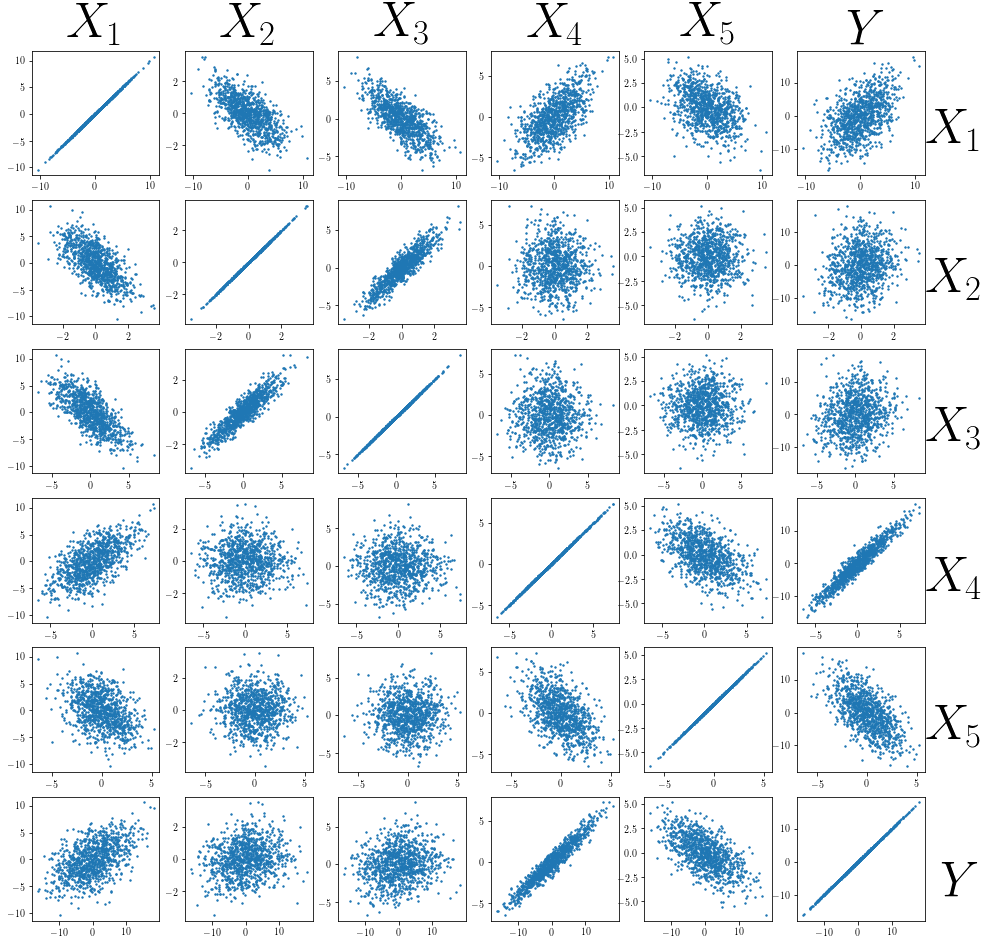

In [6]:
env_id=2
X=list_environments[env_id]['dataset'][x_indices,:]
Y=list_environments[env_id]['dataset'][y_index,:]
fig, ax = plt.subplots(nrows=len(x_indices)+1,ncols=len(x_indices)+1, figsize=(16,16))
for i,j in itertools.product(np.arange(len(x_indices)),repeat=2):
    _ = ax[i,j].scatter(X[i,:],X[j,:],s=2, rasterized=True)
for i in np.arange(len(x_indices)):
    _ = ax[len(x_indices),i].scatter(Y, X[i,:], s=2, rasterized=True)
    _ = ax[i,len(x_indices)].scatter(X[i,:], Y, s=2, rasterized=True)
    _ = ax[0,i].set_title('$X_{}$'.format(i+1), fontsize=50)
    _ = ax[i,len(x_indices)].yaxis.set_label_position("right")
    _ = ax[i,len(x_indices)].set_ylabel('$X_{}$'.format(i+1), rotation=360, labelpad=30, fontsize=50)
_ = ax[len(x_indices),len(x_indices)].scatter(Y, Y, s=2, rasterized=True)
_ = ax[0,5].set_title('$Y$', fontsize=50)
_ = ax[5,5].yaxis.set_label_position("right")
_ = ax[5,5].set_ylabel('$Y$', rotation=360, labelpad=30, fontsize=50)
_ = plt.savefig('scatter_{}.png'.format(env_id), format='png',bbox_inches='tight')